In [2]:
import mlrose_hiive as ml

In [ ]:
# Find the hyperparameters for the Hill Climbing
best_restart_param = None
best_restart_fitness_value = None
optimum_size = None
fitness_function = [('fourpeaks', ml.ContinuousPeaks())]
for func in fitness_function:
    fitness_function = func[1]
    print("Find best RHC hyperparam for {}".format(str(fitness_function)))
    for problem_size in range(10, 100):
    #for i in [0, 25, 75, 100]:
        #for problem_size in range(10, 200):
        for i in [0, 25, 75, 100]:
            problem = ml.DiscreteOpt(length=problem_size, fitness_fn=fitness_function, maximize=True)
            rhc_best_state, rhc_best_fitness, rhc_fitness_curve = ml.random_hill_climb(problem, 
                                                                                        max_attempts = 500, 
                                                                                        max_iters=500, 
                                                                                        curve=True, 
                                                                                        random_state=42,
                                                                                        restarts = i)

            if not best_restart_fitness_value:
                best_restart_param = i
                best_restart_fitness_value = rhc_best_fitness
                optimum_size = problem_size
            elif rhc_best_fitness > best_restart_fitness_value:
                best_restart_param = i
                best_restart_fitness_value = rhc_best_fitness
                optimum_size = problem_size 
            print(f"rhc_best_state = {rhc_best_state}; rhc_fitness_curve = {rhc_fitness_curve}")
        print("Best RHC parameters for {} = {}; problem_size = {}; rhc_best_fitness = {}".format(func[0], str(best_restart_param), optimum_size, best_restart_fitness_value))
    print("Best RHC parameters for {} = {}; problem_size = {}; rhc_best_fitness = {}".format(func[0], str(best_restart_param), optimum_size, best_restart_fitness_value))

In [2]:
import numpy as np
fitness = ml.Queens()
#state = np.array([1, 4, 1, 3, 5, 5, 2, 7])
#print(fitness.evaluate(state))
fitness_function = [('queens', ml.ContinuousPeaks())]
best_restart_fitness_value = None
for func in fitness_function:
    fitness_function = func[1]
    print("Find best RHC hyperparam for {}".format(str(fitness_function)))
    '''
    problem = ml.DiscreteOpt(length=8, fitness_fn=fitness_function, maximize=True)
    rhc_best_state, rhc_best_fitness, rhc_fitness_curve = ml.random_hill_climb(problem, 
                                                                                max_attempts = 500, 
                                                                                max_iters=500, 
                                                                                curve=True, 
                                                                                random_state=42,
                                                                                restarts = i
                                                                                )
    fitness_function = func[1]
    print("Find best RHC hyperparam for {}".format(str(fitness_function)))
    #for problem_size in range(10, 100):
    '''
    #for i in [0, 25, 75, 100]:
        #for problem_size in range(10, 200):
    for i in [0, 25, 75, 100]:
        problem = ml.DiscreteOpt(length=100, fitness_fn=fitness_function, maximize=False)
        rhc_best_state, rhc_best_fitness, rhc_fitness_curve = ml.random_hill_climb(problem, 
                                                                                    max_attempts = 500, 
                                                                                    max_iters=500, 
                                                                                    curve=True, 
                                                                                    random_state=42,
                                                                                    restarts = i)

        if not best_restart_fitness_value:
            best_restart_param = i
            best_restart_fitness_value = rhc_best_fitness
        elif rhc_best_fitness > best_restart_fitness_value:
            best_restart_param = i
            best_restart_fitness_value = rhc_best_fitness
        print("restart = {}; rhc_best_fitness = {}, rhc_fitness_curve = {}".format(i, rhc_best_state, rhc_best_fitness, rhc_fitness_curve))
    print("Best RHC parameters for {} = {}; rhc_best_fitness = {}".format(func[0], str(best_restart_param), best_restart_fitness_value))
            
    
    
    
    





Find best RHC hyperparam for <mlrose_hiive.fitness.queens.Queens object at 0x7f77e94147c0>
restart = 0; rhc_best_fitness = [0 0 0 0 0 0 0 0], rhc_fitness_curve = 7.0
restart = 25; rhc_best_fitness = [0 0 0 0 0 0 0 0], rhc_fitness_curve = 7.0
restart = 75; rhc_best_fitness = [0 0 0 0 0 0 0 0], rhc_fitness_curve = 7.0
restart = 100; rhc_best_fitness = [0 0 0 0 0 0 0 0], rhc_fitness_curve = 7.0
Best RHC parameters for queens = 0; rhc_best_fitness = 7.0


In [ ]:
import itertools
hyperparams = [[1, 2, 4, 8, 16, 32, 64],
   [0.1, 0.2, 0.4, 0.8],
   [0.001, 0.01, 0.1, 1]]
values =itertools.product(*hyperparams)
best_fitness_value = None
best_param = None
best_state = None
fitness_function = [('queens', ml.ContinuousPeaks())]
problem = ml.DiscreteOpt(length=100, fitness_fn=fitness_function[0][1], maximize=False)
for value in values:
    decay = ml.GeomDecay(init_temp = value[0], decay=value[1], min_temp=value[2])
    sa_best_state, sa_best_fitness, sa_fitness_curve = ml.simulated_annealing(
                                            problem, 
                                            max_attempts=500, 
                                            max_iters=500, 
                                            curve=True, 
                                            random_state=42,
                                            schedule=decay)
    #print(f"values = {value}; sa_best_state = {sa_best_state}; sa_best_fitness = {sa_best_fitness}; sa_fitness_curve = {sa_fitness_curve}")
    if not best_fitness_value:
        best_param = value
        best_fitness_value = sa_best_fitness
        best_state = sa_best_state
    elif sa_best_fitness > best_fitness_value:
        best_param = value
        best_fitness_value = sa_best_fitness
        best_state = sa_best_state
#print(f"Best SA parameters for best_state = {best_state}; sa_best_fitness = {sa_best_fitness}".format(func[0], str(best_param)))
print(f"Best SA parameters for best_state = {best_state}; best_fitness_value = {best_fitness_value}; best_param = {best_param}")

Best SA parameters for best_state = [1 1 0 0 0 0 0 0]; best_fitness_value = 7.0; best_param = (1, 0.1, 0.001)


In [6]:
import time
import mlrose_hiive
import pandas as pd
import matplotlib.pyplot as plt
import dataframe_image as dfi
def run_continuous_peaks():
    print("Running Experiments for Four Peaks Optimization Problem")
    print()

    # Define Fitness function and discrete problem object
    fitness = mlrose_hiive.ContinuousPeaks()
    problem = mlrose_hiive.DiscreteOpt(length=100, fitness_fn=fitness, maximize=True)

    max_attempts = 100
    #max_iters = 100
    max_iters = 100
    # RHC
    print("Running Random Hill Climb Experiment")
    start_time = time.time()
    rhc_best_state, rhc_best_fitness, rhc_fitness_curve = mlrose_hiive.random_hill_climb(problem, 
                                                            max_attempts = max_attempts, 
                                                            max_iters=max_iters, 
                                                            curve=True, 
                                                            random_state=42,
                                                            restarts=10)
    end_time = time.time()
    rhc_time = end_time - start_time
    print("Time (s): {}".format(rhc_time))
    print()

    # SA
    print("Running Simulated Annealing Experiment")
    start_time = time.time()
    sa_best_state, sa_best_fitness, sa_fitness_curve = mlrose_hiive.simulated_annealing(
                                                        problem, 
                                                        max_attempts=max_attempts, 
                                                        max_iters=max_attempts, 
                                                        curve=True, 
                                                        random_state=42,
                                                        schedule=mlrose_hiive.GeomDecay(init_temp = 1, decay=0.1, min_temp=1))
    end_time = time.time()
    sa_time = end_time - start_time
    print("Time (s): {}".format(sa_time))
    print()

    # GA
    print("Running Genetic Algorithm Experiment")
    start_time = time.time()
    ga_best_state, ga_best_fitness, ga_fitness_curve = mlrose_hiive.genetic_alg(
                                                        problem, 
                                                        max_attempts=max_attempts, 
                                                        max_iters=max_iters, 
                                                        curve=True, 
                                                        random_state=42,
                                                        pop_size=200,
                                                        mutation_prob=0.2)
    end_time = time.time()
    ga_time = end_time - start_time
    print("Time (s): {}".format(ga_time))
    print()
    # MIMIC
    print("Running MIMIC Algorithm Experiment")
    start_time = time.time()
    mimic_best_state, mimic_best_fitness, mimic_fitness_curve = mlrose_hiive.mimic(
                                                                problem, 
                                                                max_attempts = max_attempts, 
                                                                max_iters = max_iters,  
                                                                curve = True, 
                                                                random_state = 42,
                                                                keep_pct=0.25)
    end_time = time.time()
    mimic_time = end_time - start_time
    print("Time (s): {}".format(mimic_time))
    print()

    # Plot Iterations vs Fitness
    iterations = range(1, 101)
    plt.plot(iterations, rhc_fitness_curve, label='RHC', color='green')
    plt.plot(iterations, sa_fitness_curve, label='SA', color='red')
    plt.plot(iterations, ga_fitness_curve, label='GA', color='blue')
    plt.plot(iterations, mimic_fitness_curve, label='MIMIC', color='orange')
    plt.legend(loc="best")
    plt.xlabel("Iterations")
    plt.ylabel("Fitness")
    plt.savefig("results/continuous_fitness.png")

    data = [('RHC', round(rhc_time, 5)), 
            ('SA', round(sa_time, 5)), 
            ('GA', round(ga_time, 5)), 
            ('MIMIC', round(mimic_time, 5))] 
    
    df = pd.DataFrame(data, columns =['Algorithm', 'Time (s)']) 
    dfi.export(df,"results/continuous.png")



Running Experiments for Four Peaks Optimization Problem

Running Random Hill Climb Experiment
Time (s): 0.042748212814331055

Running Simulated Annealing Experiment
Time (s): 0.005890846252441406

Running Genetic Algorithm Experiment
Time (s): 1.473250150680542

Running MIMIC Algorithm Experiment
Time (s): 465.4458611011505



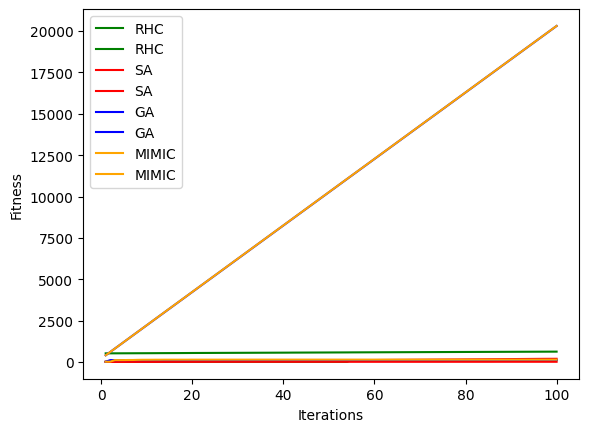

In [7]:
run_continuous_peaks()

In [8]:
def run_continuouspeak():
    print("Running Experiments for Four Peaks Optimization Problem")
    print()

    # Define Fitness function and discrete problem object
    fitness = mlrose_hiive.ContinuousPeaks()
    problem = mlrose_hiive.DiscreteOpt(length=100, fitness_fn=fitness, maximize=True)

    max_attempts = 100
    max_iters = 100
    # RHC
    print("Running Random Hill Climb Experiment")
    start_time = time.time()
    rhc_best_state, rhc_best_fitness, rhc_fitness_curve = mlrose_hiive.random_hill_climb(problem, 
                                                            max_attempts = max_attempts, 
                                                            max_iters=max_iters, 
                                                            curve=True, 
                                                            random_state=42,
                                                            restarts=100)
    end_time = time.time()
    rhc_time = end_time - start_time
    print("Time (s): {}".format(rhc_time))
    print()

    # SA
    print("Running Simulated Annealing Experiment")
    start_time = time.time()
    sa_best_state, sa_best_fitness, sa_fitness_curve = mlrose_hiive.simulated_annealing(
                                                        problem, 
                                                        max_attempts=max_attempts, 
                                                        max_iters=max_attempts, 
                                                        curve=True, 
                                                        random_state=42,
                                                        schedule=mlrose_hiive.GeomDecay(init_temp = 1, decay=0.1, min_temp=1))
    end_time = time.time()
    sa_time = end_time - start_time
    print("Time (s): {}".format(sa_time))
    print()

    # GA
    print("Running Genetic Algorithm Experiment")
    start_time = time.time()
    ga_best_state, ga_best_fitness, ga_fitness_curve = mlrose_hiive.genetic_alg(
                                                        problem, 
                                                        max_attempts=max_attempts, 
                                                        max_iters=max_iters, 
                                                        curve=True, 
                                                        random_state=42,
                                                        pop_size=200,
                                                        mutation_prob=0.2)
    end_time = time.time()
    ga_time = end_time - start_time
    print("Time (s): {}".format(ga_time))
    print()
    # MIMIC
    print("Running MIMIC Algorithm Experiment")
    start_time = time.time()
    mimic_best_state, mimic_best_fitness, mimic_fitness_curve = mlrose_hiive.mimic(
                                                                problem, 
                                                                max_attempts = max_attempts, 
                                                                max_iters = max_iters,  
                                                                curve = True, 
                                                                random_state = 42,
                                                                keep_pct=0.25)
    end_time = time.time()
    mimic_time = end_time - start_time
    print("Time (s): {}".format(mimic_time))
    print()

    # Plot Iterations vs Fitness
    iterations = range(1, 101)
    plt.plot(iterations, rhc_fitness_curve, label='RHC', color='green')
    plt.plot(iterations, sa_fitness_curve, label='SA', color='red')
    plt.plot(iterations, ga_fitness_curve, label='GA', color='blue')
    plt.plot(iterations, mimic_fitness_curve, label='MIMIC', color='orange')
    plt.legend(loc="best")
    plt.xlabel("Iterations")
    plt.ylabel("Fitness")
    plt.savefig("results/fourpeaks_fitness.png")

    # Plot Time Table
    # https://www.geeksforgeeks.org/creating-a-pandas-dataframe-using-list-of-tuples/
    data = [('RHC', round(rhc_time, 5)), 
            ('SA', round(sa_time, 5)), 
            ('GA', round(ga_time, 5)), 
            ('MIMIC', round(mimic_time, 5))] 
    
    df = pd.DataFrame(data, columns =['Algorithm', 'Time (s)']) 
    dfi.export(df,"results/fourpeaks_times.png")

Running Experiments for Four Peaks Optimization Problem

Running Random Hill Climb Experiment
Time (s): 0.5388801097869873

Running Simulated Annealing Experiment
Time (s): 0.005701780319213867

Running Genetic Algorithm Experiment
Time (s): 1.552473783493042

Running MIMIC Algorithm Experiment
Time (s): 408.3647038936615



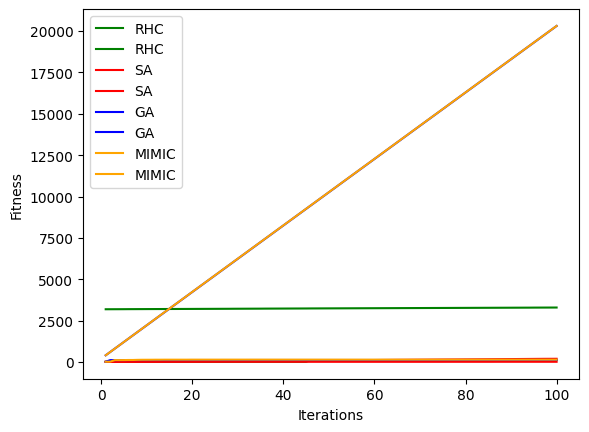

In [9]:
run_knapsack()